In [32]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [33]:
df=pd.read_csv(r"F:\ML\100 days ml\data\train.csv")

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Survived', ylabel='Sex'>

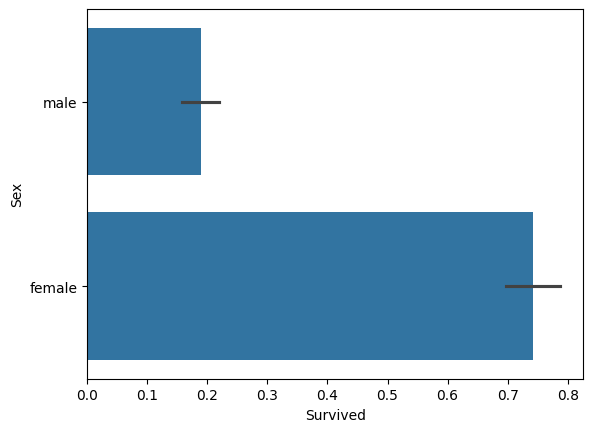

In [37]:
sns.barplot(x=df["Survived"],y=df["Sex"])

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [39]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=["Survived"]),df["Survived"],random_state=42,test_size=0.2)

In [40]:
x_train.shape,x_test.shape

((712, 7), (179, 7))

In [41]:
df.shape

(891, 8)

In [42]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [43]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [44]:
x_train.isnull().sum()

Pclass        0
Sex           0
Age         140
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [45]:
si_age=SimpleImputer()
si_embarked=SimpleImputer(strategy="most_frequent")
x_train_age=si_age.fit_transform(x_train[["Age"]])
x_test_age=si_age.transform(x_test[["Age"]])

x_train_embarked=si_embarked.fit_transform(x_train[["Embarked"]])
x_test_embarked=si_embarked.transform(x_test[["Embarked"]])

In [46]:
x_train_embarked

array([['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['Q'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['Q'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['Q'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
      

In [47]:
ohe_sex=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
ohe_embarked=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

x_train_sex=ohe_sex.fit_transform(x_train[["Sex"]])
x_train_embarked=ohe_embarked.fit_transform(x_train_embarked)

x_test_sex=ohe_sex.transform(x_test[["Sex"]])
x_test_embarked=ohe_embarked.transform(x_test_embarked)


In [48]:
x_train_embarked

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [49]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [50]:
x_train_rem=x_train.drop(columns=['Sex','Age','Embarked'])
x_train_rem

,Pclass,SibSp,Parch,Fare
331,1,0,0,28.5000
733,2,0,0,13.0000
382,3,0,0,7.9250
704,3,1,0,7.8542
813,3,4,2,31.2750
...,...,...,...,...
106,3,0,0,7.6500
270,1,0,0,31.0000
860,3,2,0,14.1083
435,1,1,2,120.0000


In [51]:
x_test_rem=x_test.drop(columns=['Sex','Age','Embarked'])

In [52]:
x_test_rem

,Pclass,SibSp,Parch,Fare
709,3,1,1,15.2458
439,2,0,0,10.5000
840,3,0,0,7.9250
720,2,0,1,33.0000
39,3,1,0,11.2417
...,...,...,...,...
433,3,0,0,7.1250
773,3,0,0,7.2250
25,3,1,5,31.3875
84,2,0,0,10.5000


In [53]:
x_train_transformed=np.concatenate((x_train_age,x_train_embarked,x_train_rem,x_train_sex),axis=1)
x_test_transformed=np.concatenate((x_test_age,x_test_embarked,x_test_rem,x_test_sex),axis=1)

In [54]:
print("x_test_age:", x_test_age.shape)
print("x_test_embarked:", x_test_embarked.shape)
print("x_test_rem:", x_test_rem.shape)
print("x_test_sex:", x_test_sex.shape)


x_test_age: (179, 1)
x_test_embarked: (179, 3)
x_test_rem: (179, 4)
x_test_sex: (179, 2)


In [55]:
x_train_transformed

array([[ 45.5   ,   0.    ,   0.    , ...,  28.5   ,   0.    ,   1.    ],
       [ 23.    ,   0.    ,   0.    , ...,  13.    ,   0.    ,   1.    ],
       [ 32.    ,   0.    ,   0.    , ...,   7.925 ,   0.    ,   1.    ],
       ...,
       [ 41.    ,   0.    ,   0.    , ...,  14.1083,   0.    ,   1.    ],
       [ 14.    ,   0.    ,   0.    , ..., 120.    ,   1.    ,   0.    ],
       [ 21.    ,   0.    ,   0.    , ...,  77.2875,   0.    ,   1.    ]])

In [56]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [57]:
y_pred=clf.predict(x_test_transformed)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.776536312849162

In [59]:
import pickle
pickle.dump(ohe_sex,open("models/ohe_sex.pkl","wb"))
pickle.dump(ohe_embarked,open("models/ohe_embarked.pkl","wb"))
pickle.dump(clf,open('models/clf.pkl','wb'))